In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')

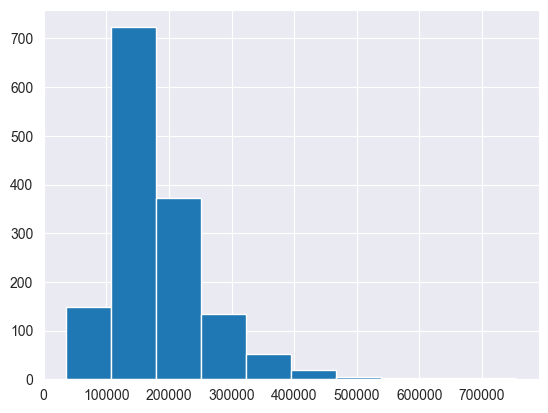

In [3]:
plt.clf()
plt.hist(train_set.loc[:,'SalePrice'])
plt.show()

In [4]:
train_set.loc[:,'SalePrice_log1p'] = np.log1p(train_set.loc[:,'SalePrice'])

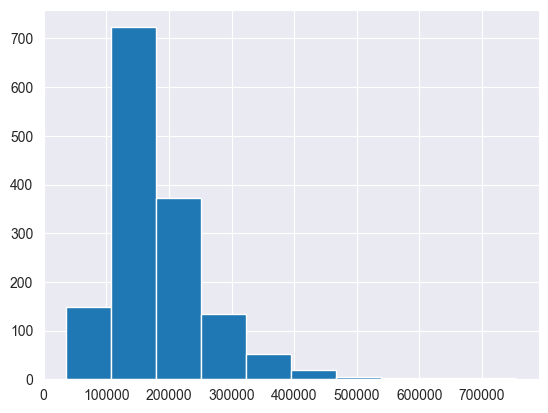

In [5]:
plt.clf()
plt.hist(train_set.loc[:,'SalePrice'])
plt.show()

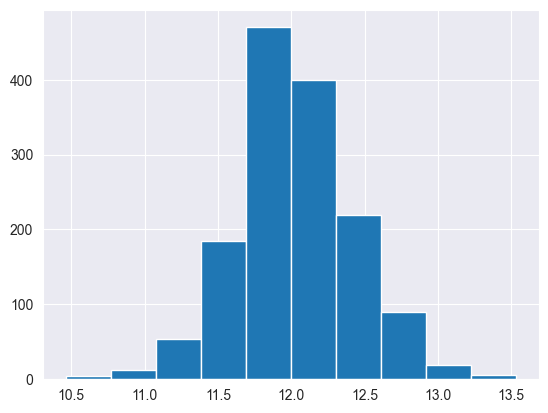

In [6]:
plt.clf()
plt.hist(train_set.loc[:,'SalePrice_log1p'])
plt.show()

In [7]:
train_set.drop(['Id'],axis=1,inplace=True)

<Figure size 640x480 with 0 Axes>

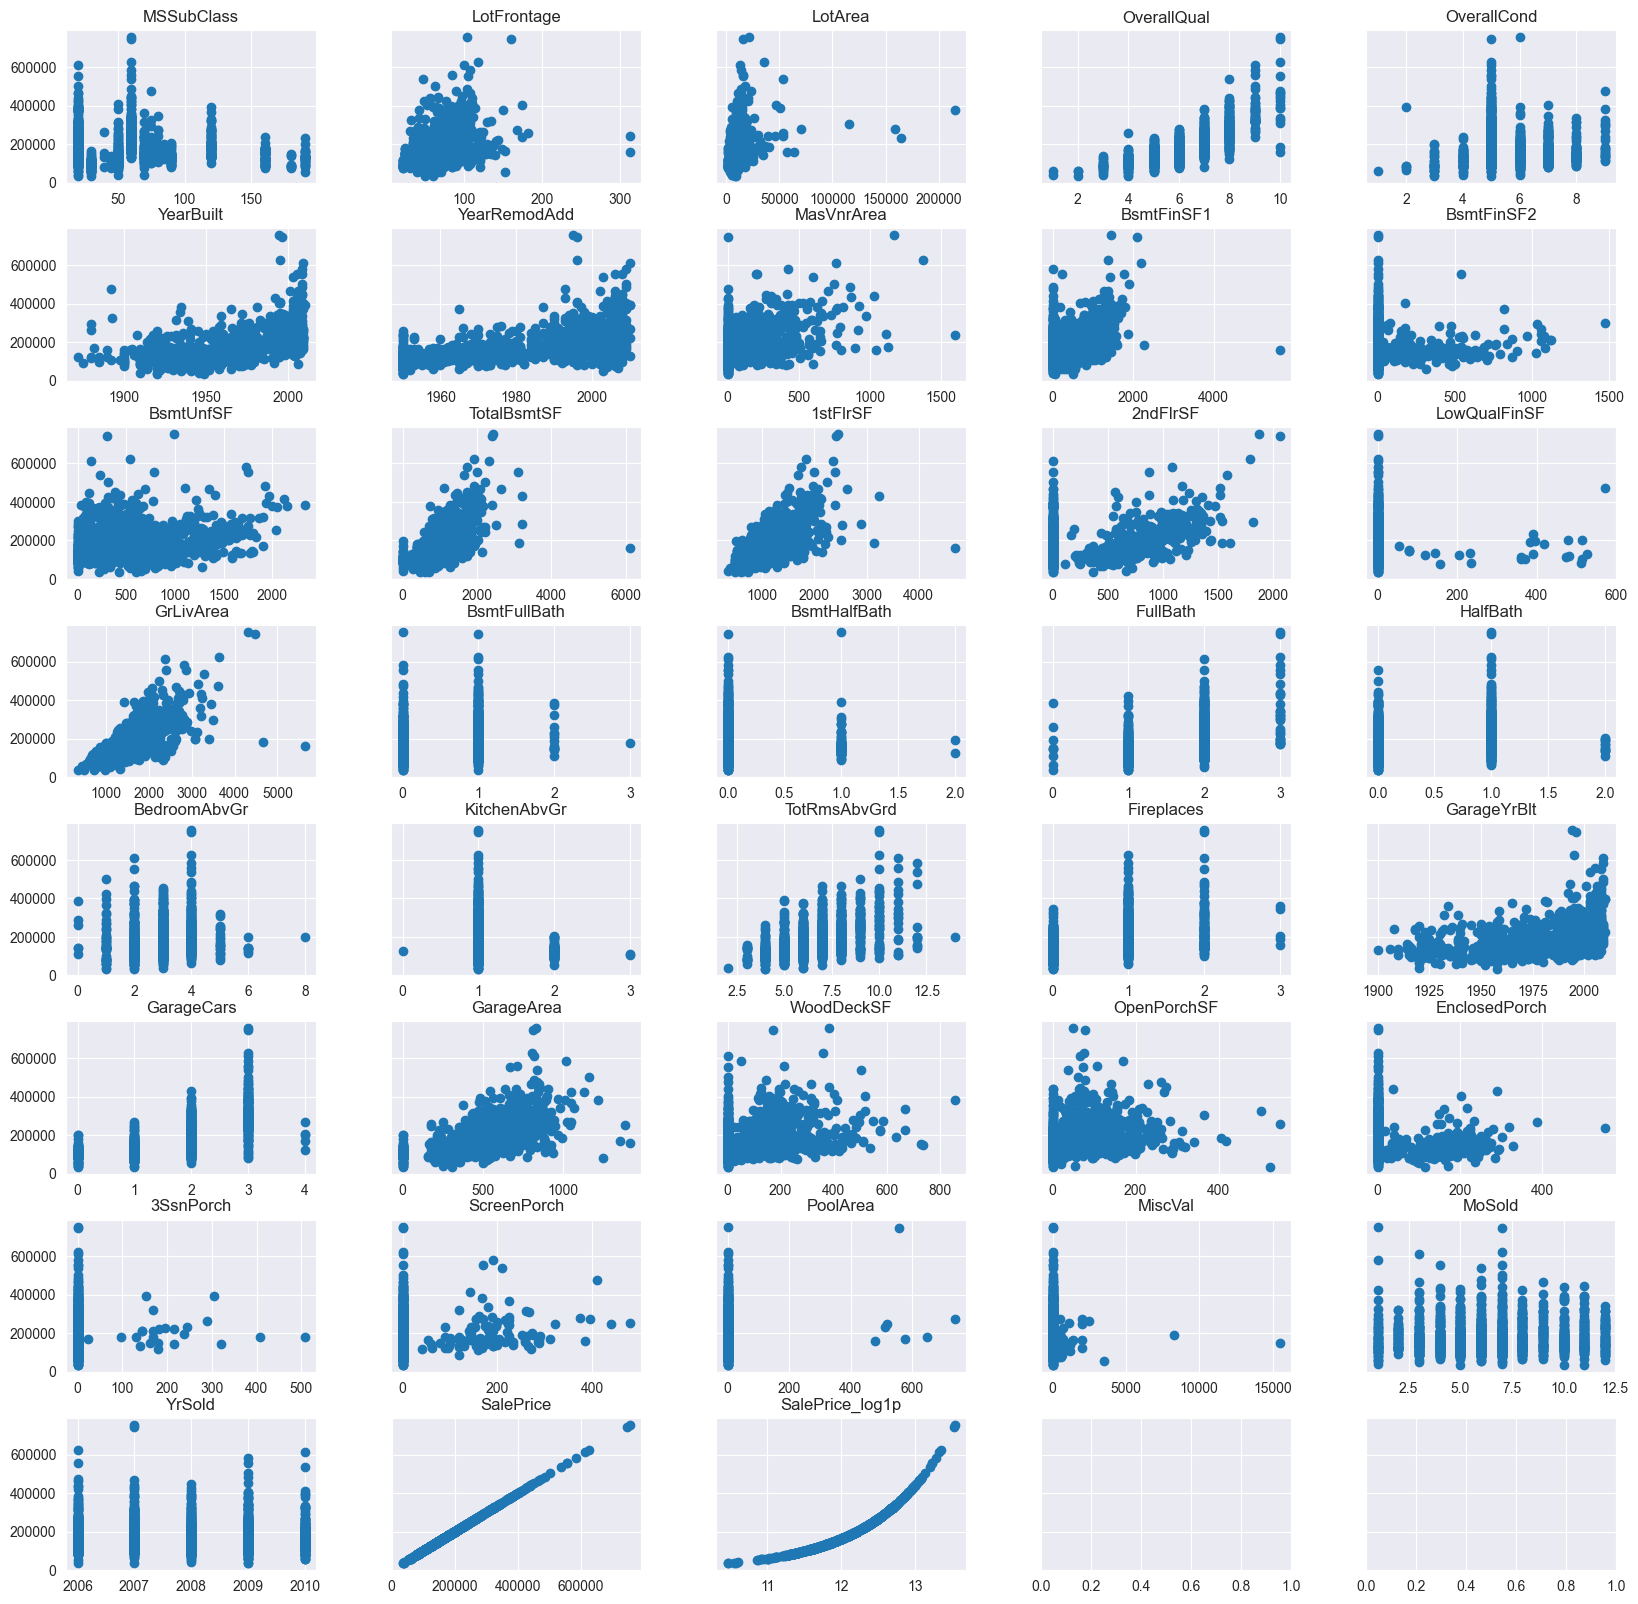

In [8]:
mask=train_set.dtypes!='object'
num_cols=tuple(train_set.dtypes[mask].index)

fig_col=5

plt.clf()
fig,axes=plt.subplots(
    int(np.ceil(len(num_cols)/fig_col)),
    fig_col,
    figsize=(20,20),
    sharey=True)

for i,col in zip(range(len(num_cols)),num_cols):
    axes[i//fig_col,i%fig_col].scatter(train_set.loc[:,col].values,train_set.loc[:,'SalePrice'].values)
    axes[i//fig_col,i%fig_col].set_title(col)
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

Text(0.5, 1.0, 'Missing values heatmap')

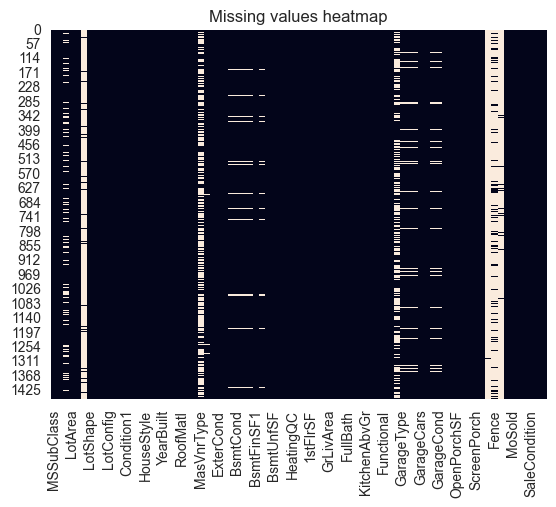

In [9]:
import seaborn as sns
train_set.isnull().sum()
sns.heatmap(train_set.isnull(), cbar = False).set_title("Missing values heatmap")

In [10]:
train_set.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolQC  Fence MiscFeature MiscVal  \
0           

In [11]:
Y_train=train_set.loc[:,'SalePrice_log1p'].values
train_set.drop(['SalePrice','SalePrice_log1p'],axis=1,inplace=True)

test_ID=test_set.loc[:,'Id']
test_set.drop(['Id'],axis=1,inplace=True)

n_train=train_set.shape[0]
n_test=test_set.shape[0]
data=pd.concat((train_set,test_set),axis=0).reset_index(drop=True) 

In [12]:
data.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [13]:
mask=data.dtypes!='object'
num_cols=tuple(data.dtypes[mask].index)

In [14]:
fake_missing_cols=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                  'BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                  'PoolQC','Fence','MiscFeature']
for col in fake_missing_cols:
    data.loc[:,col].fillna('None',inplace=True)

C:\Users\triik\AppData\Local\Temp\ipykernel_19580\209459143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:,col].fillna('None',inplace=True)


Text(0.5, 1.0, 'Missing values heatmap')

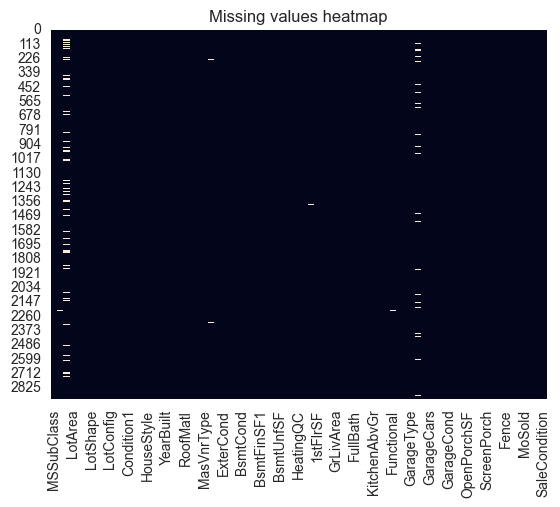

In [15]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

In [16]:
num_col=['LotFrontage','LotFrontage']
for col in num_cols:
    median=data.loc[:,col].median()
    data.loc[:,col].fillna(median,inplace=True)

C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2895923291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:,col].fillna(median,inplace=True)
C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2895923291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Text(0.5, 1.0, 'Missing values heatmap')

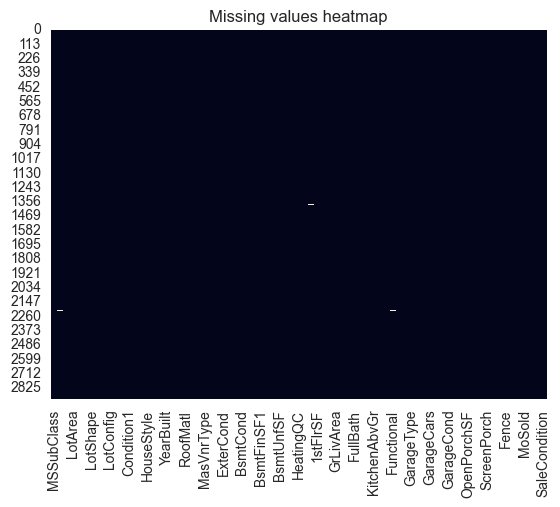

In [17]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

In [18]:
cat_missing_cols=['MSZoning','Utilities','Functional','Electrical','KitchenQual',
                 'Exterior1st','Exterior2nd','SaleType','MSSubClass']
for col in cat_missing_cols:
    mode=data.loc[:,col].mode()[0]
    data.loc[:,col].fillna(mode,inplace=True)

C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2447960316.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:,col].fillna(mode,inplace=True)
C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2447960316.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

Text(0.5, 1.0, 'Missing values heatmap')

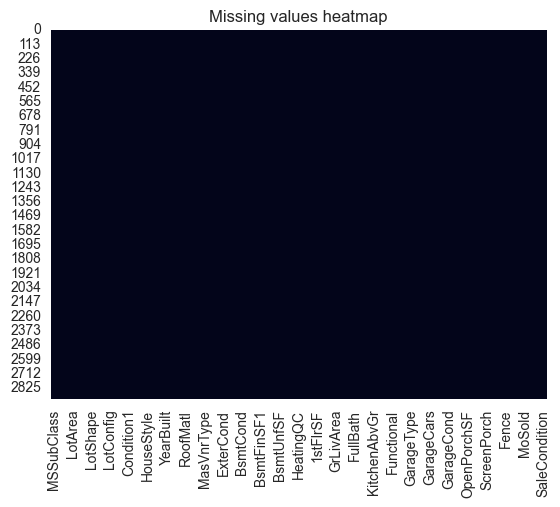

In [19]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values heatmap")

In [20]:
orderd_cat_cols=['Street','Alley','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual',
                 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual',
                 'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                 'PavedDrive','PoolQC','Fence']

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in orderd_cat_cols:
    label = LabelEncoder()
    label.fit(list(data.loc[:,col].values))
    data[col] = label.transform(list(data.loc[:,col].values))

In [22]:
X_train=data.iloc[:n_train,:].values
X_test=data.iloc[n_train:,:].values

In [23]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,1,1,3,Lvl,0,Inside,...,0,0,3,4,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,1,1,3,Lvl,0,FR2,...,0,0,3,4,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,1,1,0,Lvl,0,Inside,...,0,0,3,4,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,1,1,0,Lvl,0,Corner,...,0,0,3,4,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,1,1,0,Lvl,0,FR2,...,0,0,3,4,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,1,1,3,Lvl,0,Inside,...,0,0,3,4,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,1,1,3,Lvl,0,Inside,...,0,0,3,4,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,1,1,3,Lvl,0,Inside,...,0,0,3,4,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,1,1,3,Lvl,0,Inside,...,0,0,3,2,Shed,700,7,2006,WD,Normal


In [24]:
data.loc[:,'MSSubClass']=data.loc[:,'MSSubClass'].astype(str)
data.loc[:,'YrSold']=data.loc[:,'YrSold'].astype(str)
data.loc[:,'MoSold']=data.loc[:,'MoSold'].astype(str)

C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2541505813.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['60' '20' '60' ... '20' '85' '60']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:,'MSSubClass']=data.loc[:,'MSSubClass'].astype(str)
C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2541505813.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2008' '2007' '2008' ... '2006' '2006' '2006']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:,'YrSold']=data.loc[:,'YrSold'].astype(str)
C:\Users\triik\AppData\Local\Temp\ipykernel_19580\2541505813.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2' '5' '9' ... '9' '7' '11']' has dtype incompatible with int64

In [25]:
data=pd.get_dummies(data)
data.shape

(2919, 245)

In [26]:
X_train=data.iloc[:n_train,:].values
X_test=data.iloc[n_train:,:].values

In [27]:

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm,ensemble

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [28]:
def rmse(model):
    score=np.sqrt(-cross_val_score(model,X_train,Y_train,cv=10,scoring='neg_mean_squared_error',n_jobs=-1).mean())
    return score

In [29]:
Models=[


    Lasso(),
    ElasticNet(),
    KernelRidge(),

    svm.SVR(),

    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor()
]

columns=['Model_name','RMSE']
Model_compare=pd.DataFrame(columns=columns)
row_index=0

for Model in Models:
    Model_compare.loc[row_index,'Model_name']=Model.__class__.__name__
    Model_compare.loc[row_index,'RMSE']=rmse(Model)
    row_index+=1

Model_compare.sort_values(by='RMSE',ascending=True)

,Model_name,RMSE
7,GradientBoostingRegressor,0.1261
6,RandomForestRegressor,0.142996
5,BaggingRegressor,0.147095
2,KernelRidge,0.148843
4,AdaBoostRegressor,0.17599
1,ElasticNet,0.194957
0,Lasso,0.20146
3,SVR,0.203998


In [30]:
mod = ensemble.RandomForestRegressor()
mod.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
rmse(mod)

0.1420347408206895

In [33]:
Y_test=np.expm1(mod.predict(X_test))

In [34]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Y_test
sub.to_csv('res.csv',index=False)